#### Readme

# Previsão de cancelamento de reservas de um Hotel
### Projeto: Hotel Costa del Data

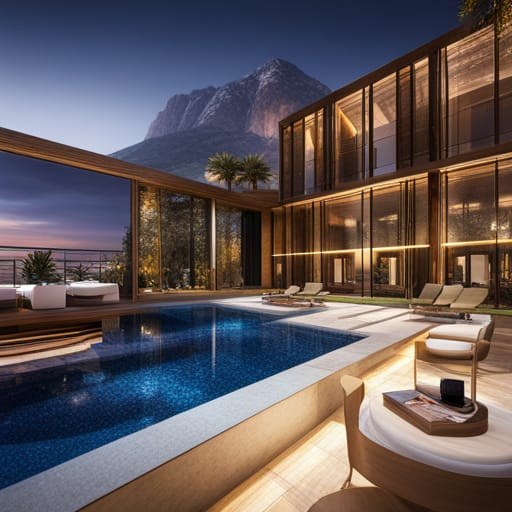

In [8]:
from IPython.display      import Image
Image('C:\Repos\Hackday2023\img_ia_hotel.jpg')

## 1. Contextualização

A Costa del Data é uma tradicional rede hoteleira espanhola. Ela possui hoje hotéis de 4 e 5 estrelas em todo o território nacional.

A empresa está preocupada com as suas projeções para os próximos anos, visando a recuperação financeira com o fim das restrições impostas pela pandemia de Covid-19.

A proposta de análise de dados do time de cientistas de dados é entender, o fenômeno de cancelamento de reservas, baseado em dados históricos, trazendo um modelo de Machine Learning que faça a previsão de cancelamentos.

Em posse dos resultados, o time de marketing tomará decisões mais assertivas, focando nos públicos com menor incidência de cancelamento, revertendo assim o cenário negativo atual. 


## 2. Problema de negócio

Com a reabertura das fronteiras, a diminuição nas restrições de viagem e o aumento das vacinações, era esperado que o setor hoteleiro da Espanha retomasse os ganhos. Tendo em vista que isso não ocorreu, a diretoria desconfia que houve uma mudança no comportamento de cancelamentos por parte do consumidor após a pandemia, que ainda não foi compreendida pela rede. 

Esse cenário dificultou estratégias de expansão, reforma de unidades já com obras programadas e ações de marketing direcionadas. Então, o desafio desse projeto, é descobrir qual é o público de clientes do hotel que tem a maior probabilidade de cancelar as reservas de diárias.


## 3. Planejamento da solução

### 3.1 Produto final

Desenvolvimento de um modelo de Machine Larning capaz de prever os clientes que irão cancelar as reservas. 

### 3.2 Ferramentas

* Pandas
* Python
* GitHub
* Jupyter notebook
* Modelos de classificação
* Bibliotecas de ML SKLearn

### 3.3 Processo: estratégias para a solução do desafio

O projeto foi construído em ciclos, esquematizado dentro da Metodologia de projetos CRISP,  que trás organização
e velocidade ao projeto. Seguindo as etapas abaixo:

a) Entendimento do problema de negócio: Levantamento dos pontos relevantes, premissas e particularidades do modelo de negócio.

b) Coleta de dados: Os dados foram coletados em formato .csv e divididos em treino e teste.

c) Descrição dos dados: Verificação da quantidade e tipos dos dados.

d) Limpeza: drop ou substituição de valores faltantes.

e) Feature engineering: Criação de novas variáveis, importantes para a asolução do problema.

f) Filtragem das variáveis

g) Análise exploratória de dados: teste das hipóteses

h) Preparação dos dados: métodos de encoding e normalização.

i) Seleção de features: escolha das features mais relevantes para a prendizagem do algoritmo

j) Modelo de Machine Learning:  O modelo deve prever a variável alvo "Reserva Cancelada", retornando 1 em caso de cancelamento, e 0 em caso de não cancelamento.

k) Avaliação do Modelo: performance (Cross Validation) e capacidade de generalização


## 4. Principais insights observados a apratir da análise de hipóteses

1. Clientes de origem mais distante, cancelam mais as suas reservas.

2. Clientes que não possuem estacionamento na sua reserva, cancelam mais.

3. Clientes que cancelam com uma grande antecedência de tempo, cancelam mais.


## 5.  Resultados do modelo de Machine Learning


## 6. Conversão dos dados para o produto financeiro



## 7. Conclusão



## 8. Referências

* O projeto foi construído em conjunto pelo time 14, composto por Denise W. Merazzi, Ezequiel P. Francisco, Maicon Vieira, Marcelo, Yves Moura, como parte do desafio proposto no Hackday 4/2023, promovido pela Comunidade DS.
* O dataset foi extraído da Plataforma Kaggle.
* O problema de negócio é fictício, baseado na realidade que desafia o contexto de negócio das redes hoteleiras ao redor do mundo. 
* A imagem foi elaborada através de uma ferramenta de Inteligência Artificial - NightCafe

In [ ]:
###### Code 

In [20]:
!pip install xgboost

In [ ]:
#pip install hyperopt

## 0.0. Imports

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import inflection
from matplotlib import pyplot as plt
%matplotlib inline

### Machine Learning Libraries ###
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, mean_squared_error, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, VarianceThreshold, SelectPercentile
from sklearn import set_config
from sklearn.impute import SimpleImputer

from math import ceil

## 0.1. Helper functions

In [68]:
def rename_columns(dataframe):
    df = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    accent = lambda x: inflection.transliterate(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_old = list(map(accent, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df


def CM(y, prediction):
    print("Confusion Matrix:")
    labels = ["Conceder", "Negar"]
    cm = confusion_matrix(y, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="binary", values_format="d")  
    plt.show() 

    
def CVS(model, X, y):
    
    scoring = {'Accuracy': make_scorer(accuracy_score),
               'Precision': make_scorer(precision_score),
               'f1': make_scorer(f1_score),
            '   Recall': make_scorer(recall_score)}
    
    y_pred = cross_val_predict(model, X, y, cv=Kfold, method='predict')
    print("\n")      
    CM(y,y_pred) 
    print("\n") 
    scores = cross_validate(model, X, y, cv = Kfold, scoring=scoring)
    for chave, valor in scores.items():
        print(f" {chave} : {valor},  {valor.mean()} +/- {valor.std()}")         

    return y_pred 

## 0.2. Loading Data

In [69]:
data_train_raw = pd.read_csv('train.csv')
data_test_raw = pd.read_csv('test.csv')

In [70]:
data = data_train_raw.copy()
df_teste = data_test_raw.copy()

## 1. Descrição dos dados

In [25]:
data.head()

,id,Classificação do hotel,Meses da reserva até o check-in,Número de pernoites reservadas,Número de hospedes,Regime de alimentação,Nacionalidade,Forma de Reserva,Já se hospedou anterioremente,Tipo do quarto reservado,Reserva feita por agência de turismo,Reserva feita por empresa,Reserva com Estacionamento,Reserva com Observações,Reserva Cancelada
0,33571,5 estrelas,5,5,2.0,Café da manha e jantar,France,Agência,Não,Amethyst,Sim,Não,Sim,Nenhuma,0
1,82458,4 estrelas,167,3,2.0,Café da manha,Spain,Agência,Não,Amethyst,Sim,Não,Não,Nenhuma,1
2,94061,4 estrelas,4,3,2.0,Café da manha,Belgium,Agência,Não,Amethyst,Sim,Não,Não,1 a 3,0
3,75196,4 estrelas,13,2,2.0,Café da manha,Spain,Agência,Não,Amethyst,Sim,Não,Não,Nenhuma,1
4,82940,4 estrelas,4,2,2.0,Café da manha,Spain,Agência,Não,Amethyst,Sim,Não,Não,Nenhuma,1


In [71]:
data['Reserva Cancelada'].value_counts()

0    45430
1    26729
Name: Reserva Cancelada, dtype: int64

In [72]:
data.sample(30)

,id,Classificação do hotel,Meses da reserva até o check-in,Número de pernoites reservadas,Número de hospedes,Regime de alimentação,Nacionalidade,Forma de Reserva,Já se hospedou anterioremente,Tipo do quarto reservado,Reserva feita por agência de turismo,Reserva feita por empresa,Reserva com Estacionamento,Reserva com Observações,Reserva Cancelada
12362,97499,4 estrelas,7,4,2.0,Café da manha,Poland,Agência,Não,Amethyst,Sim,Não,Não,1 a 3,0
35931,35572,5 estrelas,5,2,2.0,Café da manha,Ireland,Agência,Não,Amethyst,Sim,Não,Não,1 a 3,0
17760,111864,4 estrelas,1,3,2.0,Café da manha,Spain,Agência,Não,Amethyst,Sim,Não,Não,1 a 3,0
55355,92283,4 estrelas,1,2,1.0,Café da manha,Spain,B2B,Não,Amethyst,Sim,Não,Não,Nenhuma,0
65601,70811,4 estrelas,7,4,2.0,Café da manha,Spain,Agência,Não,Amethyst,Não,Não,Não,Nenhuma,1
11084,89170,4 estrelas,2,2,3.0,Café da manha,Italy,Agência,Não,Green Emerald,Sim,Não,Não,1 a 3,0
58011,49601,4 estrelas,4,3,2.0,Café da manha,Germany,Agência,Não,Amethyst,Sim,Não,Não,Nenhuma,0
45168,58330,4 estrelas,10,4,2.0,Café da manha,Spain,Agência,Não,Amethyst,Sim,Não,Não,Nenhuma,1
47919,31036,5 estrelas,1,3,2.0,Sem refeicao,Spain,Agência,Não,Amethyst,Sim,Não,Não,Nenhuma,0
11362,43210,4 estrelas,3,1,2.0,Café da manha,France,B2B,Não,Amethyst,Não,Sim,Não,Nenhuma,1


In [73]:
df_teste.head()

,id,Classificação do hotel,Meses da reserva até o check-in,Número de pernoites reservadas,Número de hospedes,Regime de alimentação,Nacionalidade,Forma de Reserva,Já se hospedou anterioremente,Tipo do quarto reservado,Reserva feita por agência de turismo,Reserva feita por empresa,Reserva com Estacionamento,Reserva com Observações
0,118345,4 estrelas,8,13,3.0,Café da manha,South Korea,Balcão,Não,Green Emerald,Sim,Não,Não,Nenhuma
1,9500,5 estrelas,5,4,769.0,Café da manha,United States,Agência,Não,Pink Sapphire,Sim,Não,Não,Nenhuma
2,34558,5 estrelas,4,11,1.0,Café da manha e jantar,United Kingdom,Agência,Não,Amethyst,Não,Não,Não,Nenhuma
3,70816,4 estrelas,7,4,2.0,Café da manha,Spain,Agência,Não,Amethyst,Não,Não,Não,Nenhuma
4,105321,4 estrelas,1,8,2.0,Café da manha,Italy,B2B,Não,Amethyst,Não,Sim,Não,1 a 3


## 1.1 Rename columns

In [74]:
# Renomeando as colunas do dataset de treino
data = rename_columns(data)

In [75]:
data.columns

Index(['id', 'classificacao_do_hotel', 'meses_da_reserva_ate_o_check_in',
       'numero_de_pernoites_reservadas', 'numero_de_hospedes',
       'regime_de_alimentacao', 'nacionalidade', 'forma_de_reserva',
       'ja_se_hospedou_anterioremente', 'tipo_do_quarto_reservado',
       'reserva_feita_por_agencia_de_turismo', 'reserva_feita_por_empresa',
       'reserva_com_estacionamento', 'reserva_com_observacoes',
       'reserva_cancelada'],
      dtype='object')

## 1.2 Data dimensions

In [76]:
data.shape

(72159, 15)

In [77]:
df_teste.shape

(48106, 14)

## 1.3 Data Types

In [78]:
# Tipos de dados do dataset de treino
data.dtypes

id                                        int64
classificacao_do_hotel                   object
meses_da_reserva_ate_o_check_in           int64
numero_de_pernoites_reservadas            int64
numero_de_hospedes                      float64
regime_de_alimentacao                    object
nacionalidade                            object
forma_de_reserva                         object
ja_se_hospedou_anterioremente            object
tipo_do_quarto_reservado                 object
reserva_feita_por_agencia_de_turismo     object
reserva_feita_por_empresa                object
reserva_com_estacionamento               object
reserva_com_observacoes                  object
reserva_cancelada                         int64
dtype: object

## 1.4 Check NA

In [79]:
data.isna().sum()

id                                         0
classificacao_do_hotel                     0
meses_da_reserva_ate_o_check_in            0
numero_de_pernoites_reservadas             0
numero_de_hospedes                         3
regime_de_alimentacao                      0
nacionalidade                           1093
forma_de_reserva                           0
ja_se_hospedou_anterioremente              0
tipo_do_quarto_reservado                   0
reserva_feita_por_agencia_de_turismo       0
reserva_feita_por_empresa                  0
reserva_com_estacionamento                 0
reserva_com_observacoes                    0
reserva_cancelada                          0
dtype: int64

## 1.5 Fillout NA

In [37]:
##data['meses_da_reserva_ate_o_check_in'] = data['meses_da_reserva_ate_o_check_in'].apply(lambda x: np.nan if x > 10  else x)
##data['numero_de_pernoites_reservadas'] = data['numero_de_pernoites_reservadas'].apply(lambda x: np.nan if x > 7  else x)
##data['numero_de_hospedes'] = data['numero_de_hospedes'].apply(lambda x: np.nan if x > 7  else x)

In [38]:
data.isna().sum()

id                                         0
classificacao_do_hotel                     0
meses_da_reserva_ate_o_check_in         5583
numero_de_pernoites_reservadas          4574
numero_de_hospedes                      1466
regime_de_alimentacao                      0
nacionalidade                           1093
forma_de_reserva                           0
ja_se_hospedou_anterioremente              0
tipo_do_quarto_reservado                   0
reserva_feita_por_agencia_de_turismo       0
reserva_feita_por_empresa                  0
reserva_com_estacionamento                 0
reserva_com_observacoes                    0
reserva_cancelada                          0
dtype: int64

## 1.6 Chance Datatypes

## 1.7 Descriptive Statistical

In [80]:
data.describe()

,id,meses_da_reserva_ate_o_check_in,numero_de_pernoites_reservadas,numero_de_hospedes,reserva_cancelada
count,72159.000000,72159.000000,72159.000000,72156.000000,72159.000000
mean,60093.687787,7.145928,15.824152,14.258773,0.370418
std,34726.028006,25.852330,98.248479,96.446167,0.482920
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30013.500000,1.000000,2.000000,2.000000,0.000000
50%,60080.000000,3.000000,3.000000,2.000000,0.000000
75%,90301.000000,6.000000,4.000000,2.000000,1.000000
max,120265.000000,311.000000,1172.000000,1153.000000,1.000000


### 1.7.1 Numeric atributtes

In [81]:
num_attributes = data.select_dtypes( include=['int64', 'float64'] )

In [82]:
num_attributes

,id,meses_da_reserva_ate_o_check_in,numero_de_pernoites_reservadas,numero_de_hospedes,reserva_cancelada
0,33571,5,5,2.0,0
1,82458,167,3,2.0,1
2,94061,4,3,2.0,0
3,75196,13,2,2.0,1
4,82940,4,2,2.0,1
...,...,...,...,...,...
72154,101851,2,3,2.0,0
72155,50800,4,2,2.0,0
72156,4101,5,2,2.0,1
72157,15828,1,8,2.0,0


### 1.7.2 Categorical atributtes

In [83]:
cat_attributes = data.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [84]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

classificacao_do_hotel                    2
regime_de_alimentacao                     4
nacionalidade                           170
forma_de_reserva                          3
ja_se_hospedou_anterioremente             2
tipo_do_quarto_reservado                 10
reserva_feita_por_agencia_de_turismo      2
reserva_feita_por_empresa                 2
reserva_com_estacionamento                2
reserva_com_observacoes                   3
dtype: int64

In [85]:
df1 = data.copy()

## 2.0. Feature Enginnering

In [ ]:
## mindmap hipóteses

## 2.1 Criação de hipóteses 

In [ ]:
## Clientes de origem mais distante, cancelam mais as suas reservas.

## Clientes que não possuem estacionamento na sua reserva, cancelam mais.

##Clientes que cancelam com uma grande antecedência de tempo, cancelam mais

## 2.2 Feature engineering

In [ ]:
data.groupby(['nacionalidade']).size().sort_values()

In [ ]:
nacionalidades_contagem  = df1['nacionalidade'].value_counts()
nacionalidades_contagem.head()

In [ ]:
data['estacionamento_sim'] = data['reserva_com_estacionamento'].apply(lambda x: 1 if x == 1 else 0)
data['estacionamento_nao'] = data['reserva_com_estacionamento'].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
continent = pd.read_csv('continent.csv')

In [ ]:
data = pd.merge(data_train_raw, continent, left_on='Nacionalidade', right_on='country', how='left')

In [ ]:
data.columns

## 3. EDA: Exploração e análise de dados

In [86]:
data['reserva_com_observacoes'].value_counts()

Nenhuma      42391
1 a 3        29542
Mais de 3      226
Name: reserva_com_observacoes, dtype: int64

In [87]:
data['tipo_do_quarto_reservado'].value_counts()

Amethyst         51778
Green Emerald    11798
Pink Sapphire     3924
Tanzanite         1782
Topaz             1245
Blue Sapphire      673
Red Ruby           573
Peridot            376
Garnet               8
Moonstone            2
Name: tipo_do_quarto_reservado, dtype: int64

## 4.0 Data Preparation

## 4.1 Encoding

In [88]:
le = LabelEncoder()
df1['classificacao_do_hotel'] = le.fit_transform( df1['classificacao_do_hotel'] )
df1['regime_de_alimentacao'] = le.fit_transform( df1['regime_de_alimentacao'] )
df1['nacionalidade'] = le.fit_transform( df1['nacionalidade'] )
df1['forma_de_reserva'] = le.fit_transform( df1['forma_de_reserva'] )
df1['continent'] = le.fit_transform( df1['continent'] )
df1['ja_se_hospedou_anterioremente'] = le.fit_transform( df1['ja_se_hospedou_anterioremente'] )
df1['tipo_do_quarto_reservado'] = le.fit_transform( df1['tipo_do_quarto_reservado'] )
df1['reserva_feita_por_agencia_de_turismo'] = le.fit_transform( df1['reserva_feita_por_agencia_de_turismo'] )
df1['reserva_feita_por_empresa'] = le.fit_transform( df1['reserva_feita_por_empresa'] )
df1['reserva_com_estacionamento'] = le.fit_transform( df1['reserva_com_estacionamento'] )
df1['reserva_com_observacoes'] = le.fit_transform( df1['reserva_com_observacoes'] )

In [ ]:
df1.head(30)

## 4.2 Rescaling - KNN Inputation

In [89]:
df1['meses_da_reserva_ate_o_check_in'] = df1['meses_da_reserva_ate_o_check_in'].apply(lambda x: np.nan if x > 10  else x)
df1['numero_de_pernoites_reservadas'] = df1['numero_de_pernoites_reservadas'].apply(lambda x: np.nan if x > 7  else x)
df1['numero_de_hospedes'] = df1['numero_de_hospedes'].apply(lambda x: np.nan if x > 7  else x)

In [90]:
df1.isna().sum()

id                                         0
classificacao_do_hotel                     0
meses_da_reserva_ate_o_check_in         5583
numero_de_pernoites_reservadas          4574
numero_de_hospedes                      1466
regime_de_alimentacao                      0
nacionalidade                              0
forma_de_reserva                           0
ja_se_hospedou_anterioremente              0
tipo_do_quarto_reservado                   0
reserva_feita_por_agencia_de_turismo       0
reserva_feita_por_empresa                  0
reserva_com_estacionamento                 0
reserva_com_observacoes                    0
reserva_cancelada                          0
dtype: int64

In [91]:
from sklearn.impute import KNNImputer

y_knn = df1['reserva_cancelada']
X_knn = df1.drop(['reserva_cancelada'], axis=1)

numerical_features = X_knn.select_dtypes(include = ['int64','float64']).columns.values
categorical_features = X_knn.select_dtypes(include = ['object']).columns.values

num_impute = KNNImputer()

num_impute.fit(X_knn[numerical_features])
X_knn[numerical_features] = num_impute.transform(X_knn[numerical_features])

In [92]:
X_knn.isnull().sum()

id                                      0
classificacao_do_hotel                  0
meses_da_reserva_ate_o_check_in         0
numero_de_pernoites_reservadas          0
numero_de_hospedes                      0
regime_de_alimentacao                   0
nacionalidade                           0
forma_de_reserva                        0
ja_se_hospedou_anterioremente           0
tipo_do_quarto_reservado                0
reserva_feita_por_agencia_de_turismo    0
reserva_feita_por_empresa               0
reserva_com_estacionamento              0
reserva_com_observacoes                 0
dtype: int64

In [93]:
X_knn['meses_da_reserva_ate_o_check_in'] = X_knn['meses_da_reserva_ate_o_check_in'].apply(lambda x: ceil(x)) 
X_knn['numero_de_pernoites_reservadas'] = X_knn['numero_de_pernoites_reservadas'].apply(lambda x: ceil(x)) 
X_knn['numero_de_hospedes'] = X_knn['numero_de_hospedes'].apply(lambda x: ceil(x))
X_knn['nacionalidade'] = X_knn['nacionalidade'].apply(lambda x: ceil(x))  

In [94]:
df1 = pd.concat([df1[['id']], X_knn, y_knn],axis=1)
df1.head()

,id,id,classificacao_do_hotel,meses_da_reserva_ate_o_check_in,numero_de_pernoites_reservadas,numero_de_hospedes,regime_de_alimentacao,nacionalidade,forma_de_reserva,ja_se_hospedou_anterioremente,tipo_do_quarto_reservado,reserva_feita_por_agencia_de_turismo,reserva_feita_por_empresa,reserva_com_estacionamento,reserva_com_observacoes,reserva_cancelada
0,33571,33571.0,1,5,5,2,1,53,0,0,0,1,0,1,2,0
1,82458,82458.0,0,6,3,2,0,140,0,0,0,1,0,0,2,1
2,94061,94061.0,0,4,3,2,0,18,0,0,0,1,0,0,0,0
3,75196,75196.0,0,2,2,2,0,140,0,0,0,1,0,0,2,1
4,82940,82940.0,0,4,2,2,0,140,0,0,0,1,0,0,2,1


## 5. Feature selection

In [95]:
df2 = df1.copy()

In [96]:
target = 'reserva_cancelada' 

selected_features = ['id',
'classificacao_do_hotel',                   
'meses_da_reserva_ate_o_check_in',          
'numero_de_pernoites_reservadas',
#'country',
'continent',
'numero_de_hospedes',                       
'regime_de_alimentacao',                     
#'nacionalidade',                           
'forma_de_reserva',                          
'ja_se_hospedou_anterioremente',            
'tipo_do_quarto_reservado',                  
'reserva_feita_por_agencia_de_turismo',      
'reserva_feita_por_empresa',                
#'reserva_com_estacionamento', 
'estacionamento_sim',
'estacionamento_nao',
'reserva_com_observacoes'                    
     
]

In [97]:
X = df2[selected_features]
y = df2[target]

## 5.1 Best features from Boruta

## 5.2 Best Features from Random Forest

In [98]:
seed=7
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state=seed)#, stratify=y
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((50511, 15), (50511,), (21648, 15), (21648,))

In [99]:
number_folds = 4
Kfold = KFold(n_splits=number_folds, shuffle=True, random_state=seed)



Confusion Matrix:


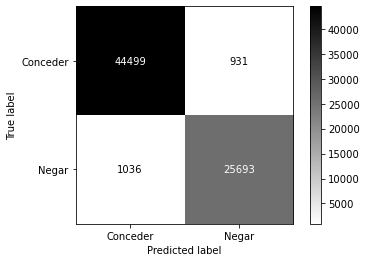



 fit_time : [2.9814539  2.86721516 2.89473796 2.9445672 ],  2.9219935536384583 +/- 0.04412664207327481
 score_time : [0.21138597 0.20514011 0.2041564  0.22303653],  0.2109297513961792 +/- 0.007519647114895938
 test_Accuracy : [0.97283814 0.97383592 0.97172949 0.97255945],  0.9727407505467643 +/- 0.0007523956460441287
 test_Precision : [0.96179775 0.96819627 0.96556842 0.96458838],  0.9650377057204615 +/- 0.0022889627672070018
 test_f1 : [0.96324081 0.96439885 0.96228369 0.96262176],  0.9631362780026941 +/- 0.0008057083179327125
 test_   Recall : [0.9646882  0.9606311  0.95902123 0.96066315],  0.9612509212919496 +/- 0.002092612135127486


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}

In [100]:
rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train,y_train)
# y_predict = rf.predict(X_val)
# print("Metrics \n", classification_report(y_val,y_predict))

CVS(rf, X, y)

rf.get_params()

In [101]:
y_train.head()

23554    0
59999    0
61241    0
8292     1
30494    0
Name: reserva_cancelada, dtype: int64

Text(0.5, 1.0, 'Feature Importance - Random Forest')

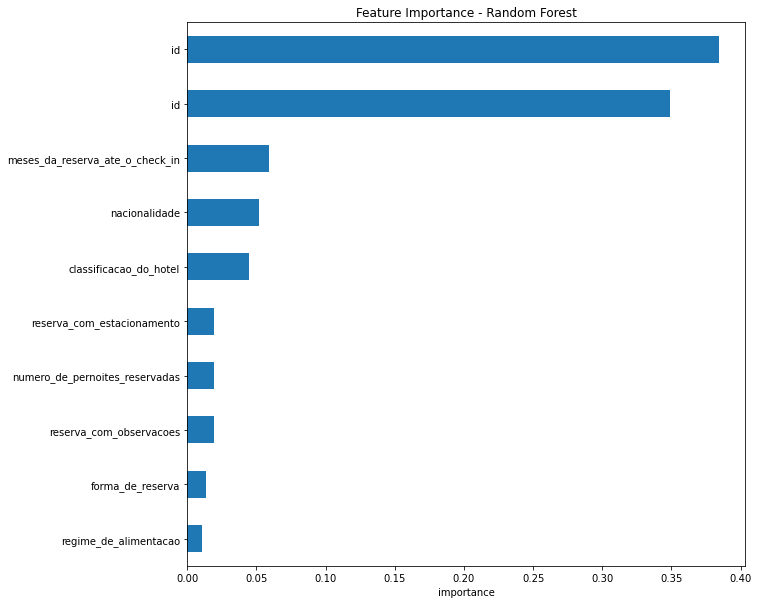

In [102]:
fig, ax = plt.subplots(figsize=(10,10))
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.xlabel('importance')
plt.title('Feature Importance - Random Forest')

## 6.0 Machine Learning Modelling

## Logistic Regressor



Confusion Matrix:


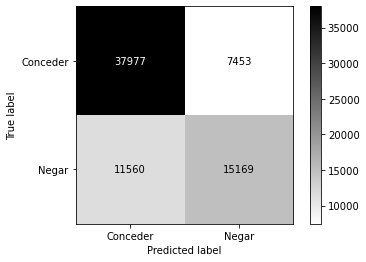



 fit_time : [0.48738885 0.5551362  0.1616888  0.15403867],  0.33956313133239746 +/- 0.18329129490634796
 score_time : [0.01750588 0.0200057  0.0200007  0.01800013],  0.01887810230255127 +/- 0.0011385874451497677
 test_Accuracy : [0.78170732 0.78187361 0.69002217 0.69244415],  0.7365118132503989 +/- 0.045286786861068906
 test_Precision : [0.71243159 0.71614749 0.61723053 0.61203875],  0.6644620895230308 +/- 0.04987855177719872
 test_f1 : [0.69823755 0.69606859 0.52881699 0.51697719],  0.6100250779219509 +/- 0.08723185905845177
 test_   Recall : [0.68459805 0.6770849  0.46255896 0.44747551],  0.5679293540210837 +/- 0.11306918794467619


array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [103]:
lr = LogisticRegression(max_iter=1000, random_state=seed)
lr.fit(X_train,y_train)


confusion_matrix
CVS(lr, X, y)

## Random Forest Classifier



Confusion Matrix:


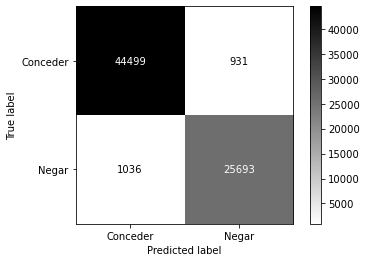



 fit_time : [3.09393644 2.92869711 2.93506575 3.00407147],  2.99044269323349 +/- 0.06666300205467043
 score_time : [0.20921707 0.20522237 0.21611929 0.20101285],  0.20789289474487305 +/- 0.005565378318390294
 test_Accuracy : [0.97283814 0.97383592 0.97172949 0.97255945],  0.9727407505467643 +/- 0.0007523956460441287
 test_Precision : [0.96179775 0.96819627 0.96556842 0.96458838],  0.9650377057204615 +/- 0.0022889627672070018
 test_f1 : [0.96324081 0.96439885 0.96228369 0.96262176],  0.9631362780026941 +/- 0.0008057083179327125
 test_   Recall : [0.9646882  0.9606311  0.95902123 0.96066315],  0.9612509212919496 +/- 0.002092612135127486


array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [104]:
rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train,y_train)
# y_predict = rf.predict(X_val)
# print("Metrics \n", classification_report(y_val,y_predict))

CVS(rf, X, y)

## XGBoost

In [105]:
xgb = XGBClassifier(random_state=seed)
xgb.fit(X_train,y_train)

CVS(xgb, X, y)

ValueError: feature_names must be unique

In [ ]:
# Predição para os dados de teste
y_pred = xgb.predict(X_val)
# Combinando os valores encontrados com os valores atuais
pd.DataFrame(data={'Rótulo Atual': y_val, 'Rótulo Predito': y_pred}).head()
print(f'Acuracia do modelo: {round(accuracy_score(y_val, y_pred)*100,3)}%')

In [ ]:
y_pred = xgb.predict(X_val)
f1 = f1_score(y_val, y_pred, average='weighted')
# exibindo o F1 Score
print(f'F1 Score do modelo: {round(f1, 3)}')

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], xgb.feature_importances_[sorted_idx])#max_num_features=50, height=0.8

plt.xlabel("Xgboost Feature Importance")

## XGBoost Hyperparameter Fine Tuning

In [ ]:
from hyperopt import hp
#import numpy as np
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
from hyperopt.pyll import scope

# XGB parameters
xgb_reg_params = {
    'learning_rate': hp.loguniform('learning_rate', -7, 0),
    'max_depth': scope.int(hp.uniform('max_depth', 1, 100)),
    'min_child_weight': hp.loguniform('min_child_weight', -2, 3),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'gamma': hp.loguniform('gamma', -10, 10),
    'alpha': hp.loguniform('alpha', -10, 10),
    'lambda': hp.loguniform('lambda', -10, 10),
    'objective': 'binary:logistic',
    'seed': 123,
}
xgb_fit_params = {
    'eval_metric': 'auc',
    'early_stopping_rounds': 10,
    'verbose': False
}
xgb_para = dict()
xgb_para['reg_params'] = xgb_reg_params
xgb_para['fit_params'] = xgb_fit_params
xgb_para['loss_func' ] = lambda y, pred: np.sqrt(mean_squared_error(y, pred))

class HPOpt(object):

    def __init__(self, X_train, X_val, y_train, y_val):
        self.X_train = X_train
        self.X_val  = X_val
        self.y_train = y_train
        self.y_val  = y_val

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def xgb_reg(self, para):
        reg = xgb.XGBRegressor(**para['reg_params'])
        return self.train_reg(reg, para)
def train_reg(self, reg, para):
        reg.fit(self.X_train, self.y_train,
                eval_set=[(self.X_train, self.y_train), (self.X_val, self.y_val)],
                **para['fit_params'])
        pred = reg.predict(self.X_val)
        loss = para['loss_func'](self.y_val, pred)
        return {'loss': loss, 'status': STATUS_OK}

obj = HPOpt(X_train, X_val, y_train, y_val)

xgb_opt = obj.process(fn_name='xgb_reg', space=xgb_para, trials=Trials(), algo=tpe.suggest, max_evals=100)

In [ ]:
xgb_opt

## Best Model Tunned on Validation - RF

In [ ]:
np.random.seed(7)

preds = []
scores = []

params = {'alpha': 4.6525878916224644e-05,
  'colsample_bytree': 0.6284061951577882,
  'gamma': 0.000600953899962259,
  'lambda': 0.6223822622373024,
  'learning_rate': 0.08214335056136404,
  'max_depth': 10,
  'min_child_weight': 0.1813407630385717,
  'subsample': 0.9994812435983946}

model_xgb_tuned = XGBClassifier(**params)

#{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 100}
model_xgb_tuned.fit(X_train, y_train)
ypred_xgb_tunned=model_xgb_tuned.predict(X_val)
preds.append(ypred_xgb_tunned)
score = (f1_score(y_val, ypred_xgb_tunned))
scores.append(score)
print("XGBoost Classifier")
print(f"F1:{score}")

print(classification_report(y_val, ypred_xgb_tunned))
print(confusion_matrix(y_val, ypred_xgb_tunned))

## Test Model

In [ ]:
df_teste = rename_columns(df_teste)

In [ ]:
df_teste.head()

In [66]:
# Label encoder
le = LabelEncoder()
df_teste['classificacao_do_hotel'] = le.fit_transform( df_teste['classificacao_do_hotel'] )
df_teste['regime_de_alimentacao'] = le.fit_transform( df_teste['regime_de_alimentacao'] )
#df_teste['continent'] = le.fit_transform(df_test['continent'])
#df_teste['estacionamento_sim'] = le.fit_transform(df_test['estacionamento_sim'])
#df_teste['estacionamento_nao'] = le.fit_transform(df_test['estacionamento_nao'])
df_teste['nacionalidade'] = le.fit_transform( df_teste['nacionalidade'] )
df_teste['forma_de_reserva'] = le.fit_transform( df_teste['forma_de_reserva'] )
df_teste['ja_se_hospedou_anterioremente'] = le.fit_transform( df_teste['ja_se_hospedou_anterioremente'] )
df_teste['tipo_do_quarto_reservado'] = le.fit_transform( df_teste['tipo_do_quarto_reservado'] )
df_teste['reserva_feita_por_agencia_de_turismo'] = le.fit_transform( df_teste['reserva_feita_por_agencia_de_turismo'] )
df_teste['reserva_feita_por_empresa'] = le.fit_transform( df_teste['reserva_feita_por_empresa'] )
df_teste['reserva_com_estacionamento'] = le.fit_transform( df_teste['reserva_com_estacionamento'] )
df_teste['reserva_com_observacoes'] = le.fit_transform( df_teste['reserva_com_observacoes'] )

KeyError: 'classificacao_do_hotel'

In [ ]:
## KNN Imputation
df_teste['meses_da_reserva_ate_o_check_in'] = df_teste['meses_da_reserva_ate_o_check_in'].apply(lambda x: np.nan if x > 10  else x)
df_teste['numero_de_pernoites_reservadas'] = df_teste['numero_de_pernoites_reservadas'].apply(lambda x: np.nan if x > 7  else x)
df_teste['numero_de_hospedes'] = df_teste['numero_de_hospedes'].apply(lambda x: np.nan if x > 7  else x)

In [ ]:
from sklearn.impute import KNNImputer

#y_knn = df_teste['reserva_cancelada']

#X_knn = df_teste.drop(['id'], axis=1)

numerical_features = X_knn.select_dtypes(include = ['int64','float64']).columns.values
categorical_features = X_knn.select_dtypes(include = ['object']).columns.values

num_impute = KNNImputer()

num_impute.fit(X_knn[numerical_features])
X_knn[numerical_features] = num_impute.transform(X_knn[numerical_features])

In [ ]:
X_knn['meses_da_reserva_ate_o_check_in'] = X_knn['meses_da_reserva_ate_o_check_in'].apply(lambda x: ceil(x)) 
X_knn['numero_de_pernoites_reservadas'] = X_knn['numero_de_pernoites_reservadas'].apply(lambda x: ceil(x)) 
X_knn['numero_de_hospedes'] = X_knn['numero_de_hospedes'].apply(lambda x: ceil(x))
X_knn['nacionalidade'] = X_knn['nacionalidade'].apply(lambda x: ceil(x)) 

In [ ]:
df_teste.head()

In [ ]:
df_teste = pd.concat([df_teste[['id']], X_knn],axis=1)

In [ ]:
df_teste.head()

In [ ]:
# Seleção de features

selected_features = ['classificacao_do_hotel',                   
'meses_da_reserva_ate_o_check_in',          
#'numero_de_pernoites_reservadas',            
#'numero_de_hospedes',                       
'regime_de_alimentacao',                     
#'nacionalidade', 
'continent',
'forma_de_reserva',                          
#'ja_se_hospedou_anterioremente',            
#'tipo_do_quarto_reservado',                  
#'reserva_feita_por_agencia_de_turismo',      
#'reserva_feita_por_empresa',                
'reserva_com_estacionamento',               
'reserva_com_observacoes'                    
     
]

In [ ]:
X_test = df_teste[selected_features]

In [ ]:
X_test.head()

## Final Model

In [ ]:
predicao_xgb = xgb.predict(X_test)

In [ ]:
df_final_lr = pd.concat([df_teste.id, pd.Series(predicao_xgb, name = 'Reserva Cancelada')], axis=1)

df_final_lr.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='nacionalidade', data=df2, 
              order=pd.value_counts(df2['paises']).iloc[:10].index, palette="brg")
plt.title('top 10 paises', weight='bold')
plt.xlabel('paises', fontsize=12)
plt.ylabel('Count', fontsize=12)

## Predict Kaggle Submission Data

In [ ]:
df_final_lr.to_csv('submission2.csv', index=False) #Arquivo de submissão pronto para ser enviado.